In [1]:
import numpy as np

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        
        self.weights = np.zeros((num_classes, num_features))
        self.bias = np.zeros(num_classes)
        
        for i in range(num_classes):
            y_i = np.where(y == i, 1, 0)
            for _ in range(self.num_iterations):
                z = np.dot(X, self.weights[i]) + self.bias[i]
                predicted = self.sigmoid(z)
                
                dw = (1/num_samples) * np.dot(X.T, (predicted - y_i))
                db = (1/num_samples) * np.sum(predicted - y_i)
                
                self.weights[i] -= self.learning_rate * dw
                self.bias[i] -= self.learning_rate * db
                
    def predict(self, X):
        num_samples = X.shape[0]
        predictions = np.zeros((num_samples, len(self.weights)))
        
        for i in range(len(self.weights)):
            z = np.dot(X, self.weights[i]) + self.bias[i]
            predicted = self.sigmoid(z)
            predictions[:, i] = predicted
            
        return np.argmax(predictions, axis=1)

In [3]:
import pandas as pd
df =pd.read_excel('output_file_tweets.xlsx')

In [4]:
df.head()

,tweets,Sentiment_Label
0,यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...,neutral
1,Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...,neutral
2,ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...,neutral
3,Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...,neutral
4,पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...,positive


In [5]:
def text_to_num(x):
    if x == 'positive':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0

In [6]:
df['sentiment_no'] = df['Sentiment_Label'].apply(text_to_num)

In [7]:
X = df['tweets']
Y = df['sentiment_no'].values
X

0      यह हक सरफ झठ क ह क वह जर स बल और वशषट बन रह कव...
1      Kurukshetra रहल गध कहत ह क हद टररजम खतरनक ह कग...
2      ManipurVoilence क बच कक महलओ क नरवसतर कर सडक प...
3      Kurukshetra I N D I A स कई इडय नह ह जत कगरस पर...
4      पढ दशबध क आलख वरष भमभण मरज मणपर क भरस जत यह अव...
                             ...                        
275    আলবব ৪০ চর আশরম এর চল নজর সগঠন তর করছন সগঠনর ন...
276    ফসবক পসট এবর বসফরক তণমল কগরস এর মখপতর তথ তণমল ...
277    মণপর ইসয নয এব বলক বঞচনর অভযগ BJP4India র বরদধ...
278        মণপর দডয বজপ সরকরর বরধত করর হমমত আছ অপরণ সনদর
279    দশর গনতনতর রকষর সবরথ আগম লকসভ ২০২৪ শ নরবচন একট...
Name: tweets, Length: 280, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 101)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_traincv = cv.fit_transform(x_train)
x_testcv = cv.transform(x_test)

In [10]:
x_testcv_array = x_testcv.toarray()
x_traincv_array = x_traincv.toarray()

In [11]:
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)

In [12]:
model.fit(x_traincv_array, y_train)

In [13]:
predictions = model.predict(x_testcv_array)

In [14]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)

In [16]:
accuracy

0.8928571428571429

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')

In [18]:
model.fit(x_traincv_array, y_train)

LogisticRegression()

In [19]:
predicts = model.predict(x_testcv_array)

In [20]:
predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
accurate = accuracy_score(y_test, predicts)
accurate

0.9107142857142857

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 0,  3,  0],
       [ 0, 50,  0],
       [ 0,  3,  0]])

In [23]:
class_label = ['Negative', 'Neutral', 'Positive']

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion matrix')

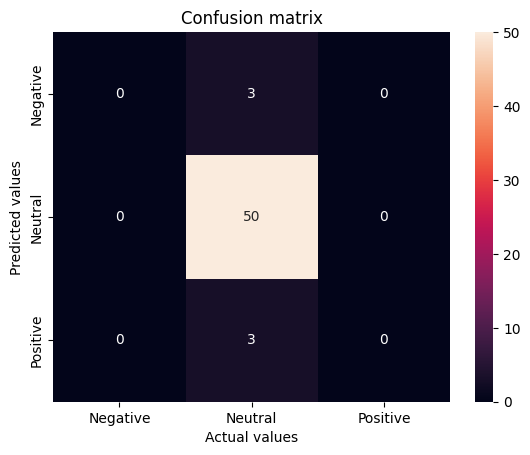

In [25]:
sns.heatmap(cm, annot = True, xticklabels = class_label, yticklabels = class_label)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix')

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [28]:
precision = precision_score(y_test, predictions, average='weighted')

/Users/rishavghosh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
precision

0.7971938775510204

In [30]:
recall = recall_score(y_test, predictions, average='weighted')

In [31]:
recall

0.8928571428571429

In [32]:
f1 = f1_score(y_test, predictions, average='weighted')

In [33]:
f1

0.8423180592991916